# Описание
Этот ноутбук содержит решение одиннадцатого домашнего задания "Методы понижения размерности"

## Результаты
1. -
2. Написана полностью
3. Написана полностью
4. Написана полностью
5. Написана полностью

## Материалы:

* [Условие задач](mspsdz11.pdf)
* [лекция](msps202011.pdf)

# Setup

## Library import
We import all the required Python libraries

In [416]:
# Data manipulation
import pandas as pd
import numpy as np

import scipy.stats as sps
from scipy.optimize import minimize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle, resample
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score

from collections import Counter
import matplotlib.pyplot as plt

# Решения

## Задача 1

## Задача 2

* Загрузим данные

In [7]:
data = pd.read_excel("./data/hw11t2_train.xlsx", header=1)
test_mask = data['V-9'].isnull()
train_mask = ~test_mask

train = shuffle(data[train_mask])
test = data[test_mask]
target_columns = ['V-9', 'V-10']

X_train = train.drop(columns=target_columns)
X_test = test.drop(columns=target_columns)

y1_train = train[target_columns[0]]
y2_train = train[target_columns[1]]

* Изучим поближе данные

In [8]:
data.head(5)

START YEAR  START QUARTER  COMPLETION YEAR  COMPLETION QUARTER  V-1  \
0          81              1               85                   1    1   
1          84              1               89                   4    1   
2          78              1               81                   4    1   
3          72              2               73                   2    1   
4          87              1               90                   2    1   

      V-2     V-3     V-4  V-5      V-6  ...   V-22.4   V-23.4  V-24.4  \
0  3150.0   920.0   598.5  190  1010.84  ...   815.50  1755.00  8002.0   
1  7600.0  1140.0  3040.0  400   963.81  ...  1316.30  8364.78  8393.0   
2  4800.0   840.0   480.0  100   689.84  ...   765.80  1755.00  4930.0   
3   685.0   202.0    13.7   20   459.54  ...   152.25  1442.31  1456.0   
4  3000.0   800.0  1230.0  410   631.91  ...  2244.10  9231.76  9286.0   

   V-25.4  V-26.4    V-27.4   V-28.4     V-29.4     V-9    V-10  
0   60.74   54.26   2978.26  41407.0   601988.1  2200.0   410.0  
1   90.95   89.79  11379.37  44835.0   929027.1  5000.0  1000.0  
2   38.70   32.04   1653.06  37933.0   377828.6  1200.0   170.0  
3    9.73    8.34    686.16   8194.0   122031.7   165.0    30.0  
4  136.60  140.20   9821.00  48260.0  1734973.5  5500.0   700.0  

[5 rows x 109 columns]

In [9]:
data.describe()

START YEAR  START QUARTER  COMPLETION YEAR  COMPLETION QUARTER  \
count  372.000000     372.000000       372.000000          372.000000   
mean    81.483871       2.190860        82.951613            2.586022   
std      4.182141       1.083382         4.223898            1.123442   
min     72.000000       1.000000        73.000000            1.000000   
25%     78.000000       1.000000        80.000000            2.000000   
50%     82.000000       2.000000        84.000000            3.000000   
75%     85.000000       3.000000        87.000000            4.000000   
max     88.000000       4.000000        90.000000            4.000000   

              V-1           V-2          V-3          V-4         V-5  \
count  372.000000    372.000000   372.000000   372.000000  372.000000   
mean     9.728495   1729.044355   426.114247   327.904086  163.118280   
std      6.563309   1802.371491   490.076498   563.544337  112.604343   
min      1.000000    200.000000    60.000000     3.700000   10.000000   
25%      4.000000    720.000000   190.000000    67.800000   80.000000   
50%      8.000000   1220.000000   300.000000   164.700000  140.000000   
75%     17.000000   2100.000000   490.500000   366.050000  230.000000   
max     20.000000  15670.000000  5000.000000  7208.200000  640.000000   

               V-6  ...       V-22.4       V-23.4        V-24.4      V-25.4  \
count   372.000000  ...   372.000000   372.000000    372.000000  372.000000   
mean    554.419839  ...  1187.484704  5403.213091   7431.560215   76.288817   
std     275.105953  ...   708.139788  3534.428753   2210.892779   39.507185   
min     193.080000  ...   152.250000  1439.000000   1450.000000    9.730000   
25%     391.677500  ...   669.800000  1755.000000   6714.000000   43.400000   
50%     522.455000  ...   938.400000  7927.570000   8315.000000   72.565000   
75%     667.905000  ...  1795.300000  9000.910000   9022.000000  109.020000   
max    3436.930000  ...  3686.300000  9967.330000  10099.300000  190.500000   

           V-26.4        V-27.4        V-28.4        V-29.4          V-9  \
count  372.000000    372.000000    372.000000  3.720000e+02   275.000000   
mean    73.446398   5915.576801  27551.883065  8.789713e+05  1549.072727   
std     43.726005   4282.641116  13516.283345  5.067320e+05  1328.387817   
min      8.340000    354.550000   8194.000000  1.218572e+05   100.000000   
25%     36.450000   1917.437500  12065.000000  5.196798e+05   630.000000   
50%     67.455000   4525.370000  25758.750000  6.592429e+05  1100.000000   
75%    112.000000   9821.000000  40234.000000  1.181856e+06  1900.000000   
max    204.800000  13596.370000  49572.000000  2.435004e+06  6800.000000   

            V-10  
count   275.0000  
mean    245.8000  
std     174.5492  
min      20.0000  
25%     110.0000  
50%     190.0000  
75%     365.0000  
max    1000.0000  

[8 rows x 109 columns]

* План решения для каждого таргета:

    1. Определим свой класс, который объединит основные методы понижения размерностей
    2. А так же класс, который объединяет Ridge и Lasso регрессии
    3. Собирём пайплайн из нормализации, понижения размерности и регрессии 
    4. Обучим это всё при помощи подбора параметров по сетке 

* Объявим обобщённый класс понижения размерностей

In [138]:
class DimensionReductor(BaseEstimator, TransformerMixin):
    def __init__(self, n_components, method_id):
        self.methods = [
            PCA(),
            KernelPCA(kernel="rbf"),
            KernelPCA(kernel="cosine"),
            KernelPCA(kernel="poly"),
            KernelPCA(kernel="sigmoid"),
            TSNE(),
            TSNE(method='exact'),
            MDS(),
            Isomap()
        ]
        assert method_id < len(self.methods)
        self.method_id = method_id
        self.n_components = n_components
    
    def fit(self, X, y):
        self.method = self.methods[self.method_id]
        self.method.n_components = self.n_components
        self.method.fit(X, y)
        return self

    def transform(self, X):
        return self.method.transform(X)

* Класс для Ridge и Lasso регрессий

In [143]:
class MultyRegression(BaseEstimator, TransformerMixin):
    def __init__(self, alpha, method_id):
        self.methods = [
            Ridge(),
            Lasso()
        ]
        assert method_id < len(self.methods)
        self.method_id = method_id
        self.alpha = alpha
    
    def fit(self, X, y):
        self.method = self.methods[self.method_id]
        self.method.alpha = self.alpha
        self.method.fit(X, y)
        return self

    def predict(self, X):
        return self.method.predict(X)

* Функция объявления пайплайна

In [198]:
def get_pipeline(**args):
    params = {
        'dim_red__method_id': sps.randint(0, 9),
        'dim_red__n_components': sps.randint(2, 110),
        'regression__method_id': sps.randint(0, 2),
        'regression__alpha': sps.uniform(loc=2, scale=20)
    }
    for k, v in args:
        assert k in params.keys()

    scaler = StandardScaler()
    dim_red = DimensionReductor(1, 1)
    reg = MultyRegression(1, 1)
    pipe = Pipeline(
        steps=[
            ('scaler', scaler),
            ('dim_red', dim_red),
            ('regression', reg)
        ]
    )
    
    return pipe, params

* Соберём всё вместе

In [213]:
def run_gs(X, y, n_iter=3000):
    pline, params = get_pipeline()
    gs = RandomizedSearchCV(
        pline,
        param_distributions=params,
        cv=KFold(3),
        scoring='neg_root_mean_squared_error',
        n_jobs=4,
        random_state=13,
        n_iter=n_iter
    ).fit(X, y)
    return gs

* И запустим на первом таргете

In [177]:
%%time
gs = run_gs(X_train, y1_train)
gs

CPU times: user 1min 31s, sys: 2.72 s, total: 1min 34s
Wall time: 44min 32s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('dim_red',
                                              DimensionReductor(method_id=1,
                                                                n_components=1)),
                                             ('regression',
                                              MultyRegression(alpha=1,
                                                              method_id=1))],
                                      verbose=False),
                   iid='deprecated', n_iter=3000, n_j...
                   

In [182]:
print('Best rmse for class V-9:', -gs.best_score_)
gs.best_estimator_

Best rmse for class V-9: 206.97397772497573


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_red', DimensionReductor(method_id=0, n_components=50)),
                ('regression',
                 MultyRegression(alpha=2.0229365147838334, method_id=0))],
         verbose=False)

* Предскажем на тесте:

In [181]:
y1_pred = gs.predict(X_train)

* **Вывод:** Лучше всего себя показала `Ridge`-регрессия с `PCA(n_component = 50)`.

* Запустим на втором таргете 

In [183]:
%%time
gs2 = run_gs(X_train, y2_train)
gs2

CPU times: user 1min 30s, sys: 2.6 s, total: 1min 33s
Wall time: 41min 44s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('dim_red',
                                              DimensionReductor(method_id=1,
                                                                n_components=1)),
                                             ('regression',
                                              MultyRegression(alpha=1,
                                                              method_id=1))],
                                      verbose=False),
                   iid='deprecated', n_iter=3000, n_j...
                   

In [185]:
print('Best rmse for class V-10:', -gs2.best_score_)
gs2.best_estimator_

Best rmse for class V-10: 41.411326946164984


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_red', DimensionReductor(method_id=0, n_components=85)),
                ('regression',
                 MultyRegression(alpha=2.6822562458026926, method_id=0))],
         verbose=False)

* Предскажем на тесте:

In [ ]:
y2_pred = gs2.predict(X_train)

* **Вывод:** На этом таргете Ridge регрессия так же себя показала лучше, правда оптимальное количество компонент возрасло до 85

## Задача 3

* Загрузим данные

In [194]:
data = pd.read_csv("./data/hw11t3_train.csv", index_col=0)

train = shuffle(data)
target_columns = ['Washington']

X = train.drop(columns=target_columns)

y = train[target_columns[0]]

* Изучим поближе данные

In [196]:
data.head()

Washington     Carter    Clinton   Bush jr.  Roosevelt       Tucker  \
0    3.734073  -9.457681  27.549700 -11.985751   1.901486  -669.538235   
1    2.551721 -24.627005 -15.520941  12.029495   3.703952   365.589767   
2    2.918376   5.445903  33.389551   2.186544   1.409118 -1085.204284   
3    2.560226  13.506337  25.484365  11.080659   1.083449  -467.031753   
4    2.424035 -19.448434 -30.360407   7.138340   4.142661  -543.512743   

      Trump  Eisenhower     Reagan       Ford      Nixon     Johnson  \
0  6.072319   -1.046536  -1.850577  -8.462503  28.644939  165.300587   
1  6.115587   -0.834076  12.575440   4.661140  16.216623  -98.009037   
2  2.380016    3.450318   0.168421 -29.750741  45.294247   84.329562   
3  5.876512   -1.977780   3.577079  -6.203411  29.395979  147.616360   
4  3.921131   -3.514755   6.543723 -37.061819  42.713911 -133.607567   

      Kennedy  
0  -59.154245  
1 -146.352608  
2   -9.409634  
3  -98.203858  
4 -121.587831

(array([82., 93., 45., 30., 30., 30., 33., 31., 19., 25.]),
 array([0.03307378, 0.42717442, 0.82127507, 1.21537571, 1.60947635,
        2.003577  , 2.39767764, 2.79177828, 3.18587893, 3.57997957,
        3.97408021]),
 <a list of 10 Patch objects>)

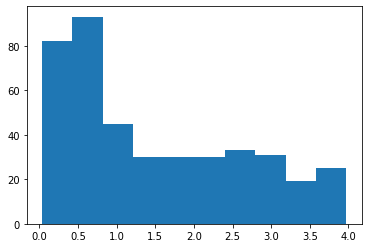

In [202]:
plt.hist(y)

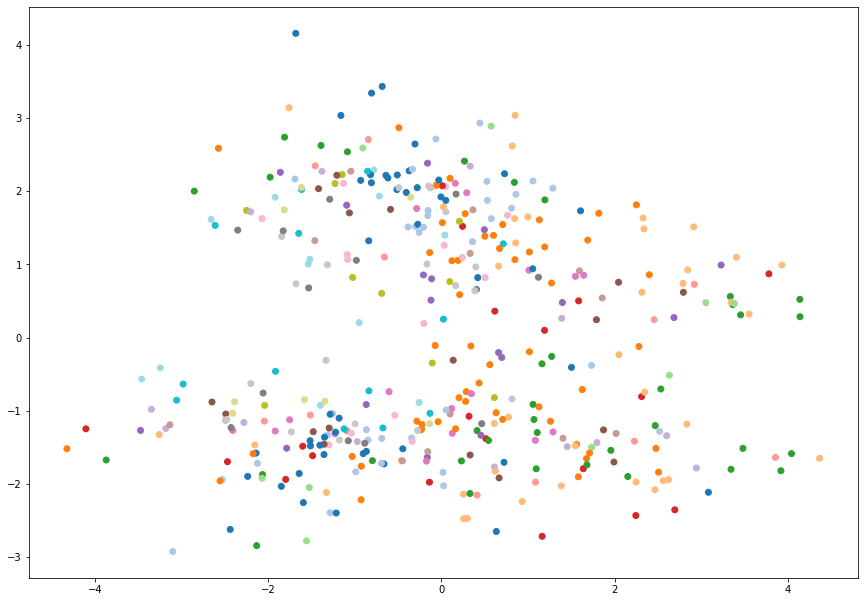

In [209]:
pca = PCA(2)
X_scaled = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(29.7/2, 21./2))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(y-y.min()) / (y.max() - y.min()), cmap="tab20")
plt.show()

* **План решения:** На самом деле почти всё для решения уже есть, весь основной функционал определён во второй задаче, просто Do it!

* Модифицируем пайплайн под эту задачу

In [221]:
def get_pipeline(**args):
    params = {
        'dim_red__method_id': sps.randint(0, 9),
        'dim_red__n_components': sps.randint(2, 14),
        'regression__method_id': sps.randint(0, 2),
        'regression__alpha': sps.uniform(loc=0.01, scale=10)
    }
    for k, v in args:
        assert k in params.keys()

    scaler = StandardScaler()
    dim_red = DimensionReductor(1, 1)
    reg = MultyRegression(1, 1)
    pipe = Pipeline(
        steps=[
            ('scaler', scaler),
            ('dim_red', dim_red),
            ('regression', reg)
        ]
    )
    
    return pipe, params

def run_gs(X, y, n_iter=3000):
    pline, params = get_pipeline()
    gs = RandomizedSearchCV(
        pline,
        param_distributions=params,
        cv=KFold(3),
        scoring='neg_root_mean_squared_error',
        n_jobs=4,
        random_state=13,
        n_iter=n_iter
    ).fit(X, y)
    return gs

In [222]:
%%time
gs = run_gs(X, y, n_iter=3000)
gs

CPU times: user 1min 28s, sys: 2.71 s, total: 1min 31s
Wall time: 1h 20min 45s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('dim_red',
                                              DimensionReductor(method_id=1,
                                                                n_components=1)),
                                             ('regression',
                                              MultyRegression(alpha=1,
                                                              method_id=1))],
                                      verbose=False),
                   iid='deprecated', n_iter=3000, n_j...
                   

In [223]:
print('Best rmse for class Washington:', -gs.best_score_)
gs.best_estimator_

Best rmse for class Washington: 0.758272316260602


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_red', DimensionReductor(method_id=1, n_components=13)),
                ('regression',
                 MultyRegression(alpha=1.1344156281105178, method_id=0))],
         verbose=False)

* **Вывод:** Лучшим себя показал Ridge с KernelPCA, который не изменяет кол-во фичей

## Задача 4

* Загрузим данные

In [230]:
data = fetch_olivetti_faces()
images = data["images"]
target = data["target"]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/alex-kozinov/scikit_learn_data


* Изучим данные

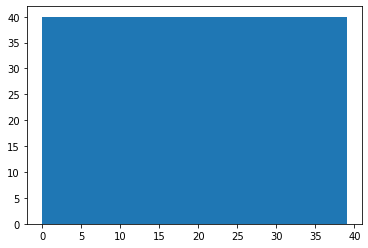

In [253]:
plt.hist(target)
plt.show()

In [252]:
Counter(target)

Counter({0: 10,
         1: 10,
         2: 10,
         3: 10,
         4: 10,
         5: 10,
         6: 10,
         7: 10,
         8: 10,
         9: 10,
         10: 10,
         11: 10,
         12: 10,
         13: 10,
         14: 10,
         15: 10,
         16: 10,
         17: 10,
         18: 10,
         19: 10,
         20: 10,
         21: 10,
         22: 10,
         23: 10,
         24: 10,
         25: 10,
         26: 10,
         27: 10,
         28: 10,
         29: 10,
         30: 10,
         31: 10,
         32: 10,
         33: 10,
         34: 10,
         35: 10,
         36: 10,
         37: 10,
         38: 10,
         39: 10})

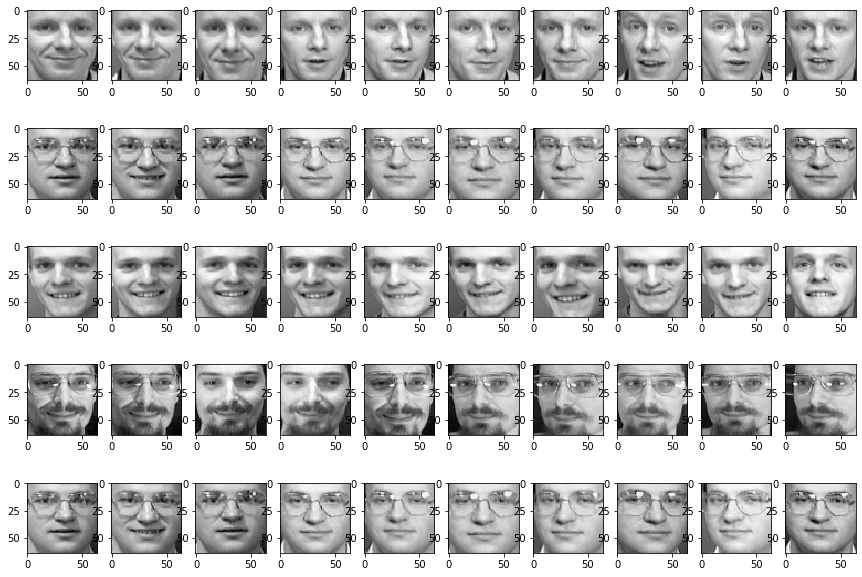

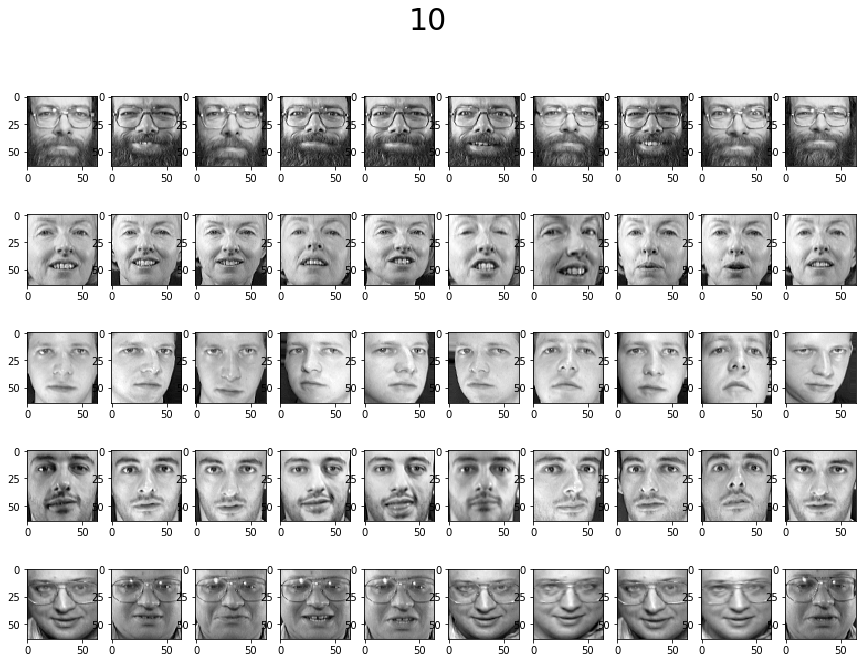

In [298]:
def draw_sample(X, y, h=5, w=10, title=''):
    subsample = np.random.choice(np.unique(y), h)
    
    plt.figure(figsize=(29.7/2, 21./2))
    plt.suptitle(title, fontsize=30)
    for i, t in enumerate(subsample):
        img_grep = X[y == t]
        n = img_grep.shape[0]
        for j in range(n):
            
            plt.subplot(h, w, i*10+j+1)
            plt.imshow(img_grep[j], cmap='gray')
    plt.show()

draw_sample(images, target)
draw_sample(images, target, title='10')

> Спроецировать изображения на пространство, натянутое на k главных компонент

project on K in  [ 8 16 24 32 40 48 56 64]


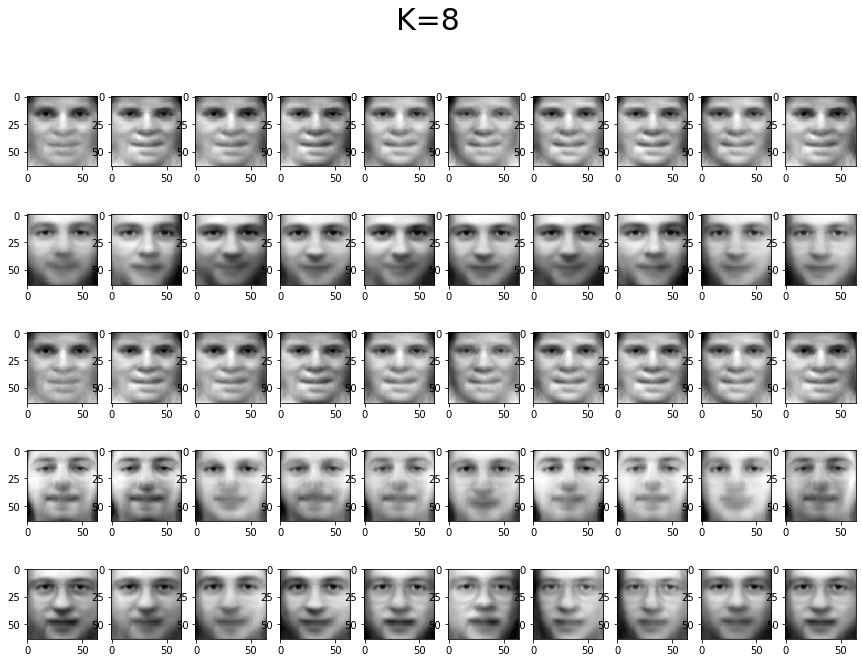

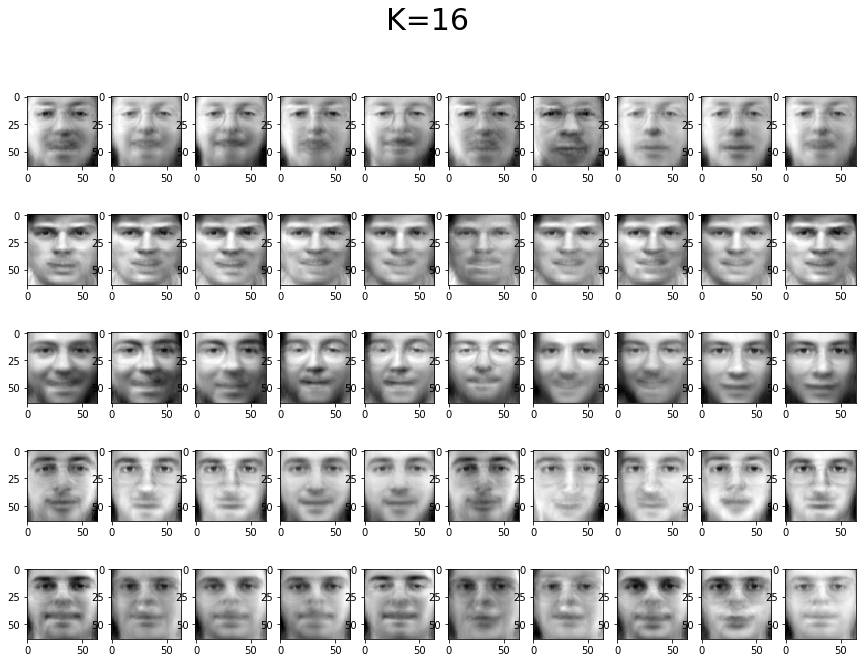

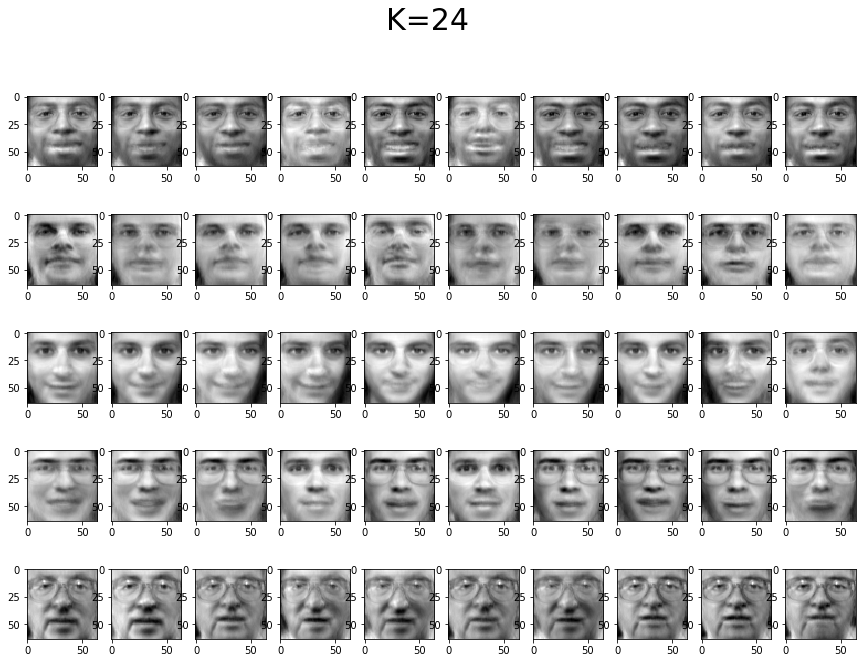

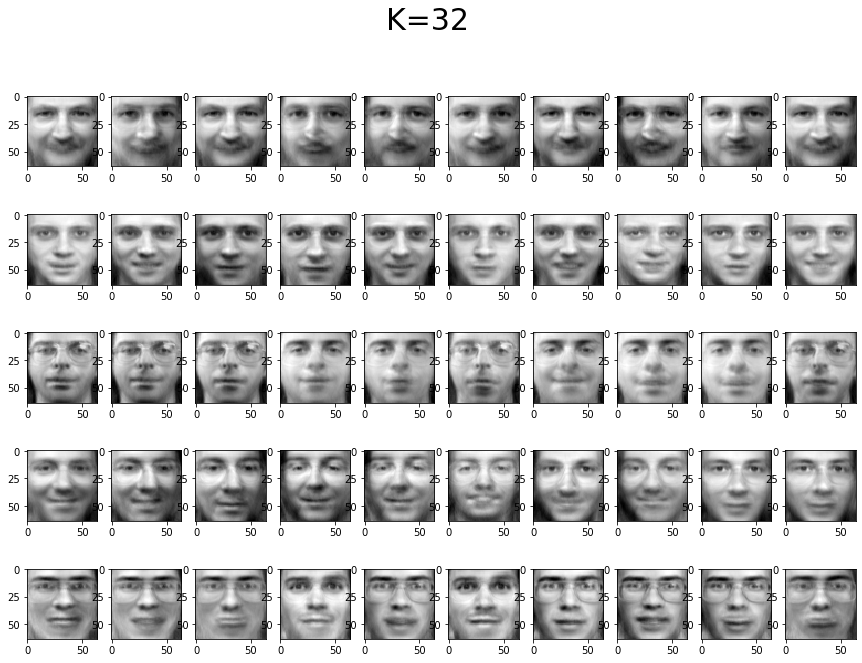

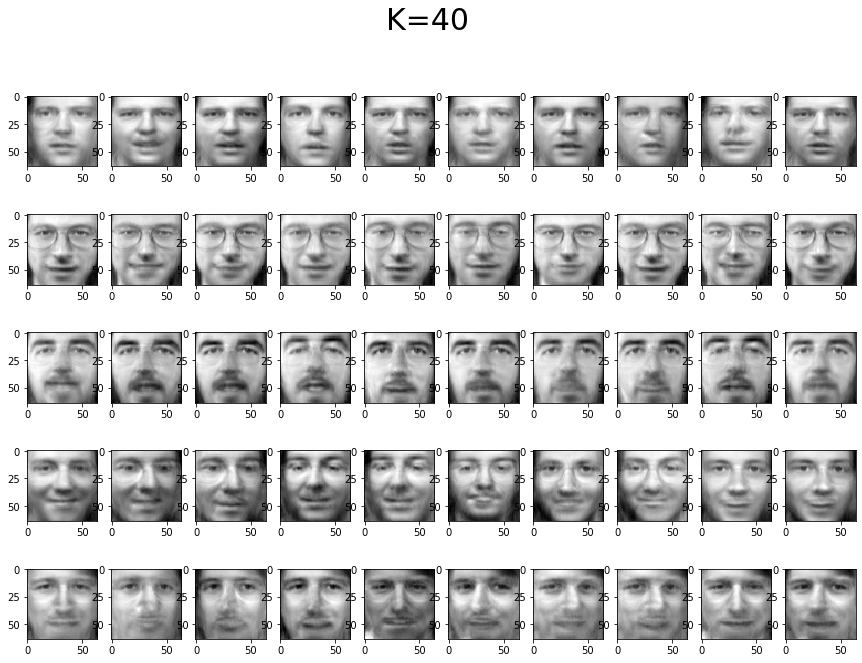

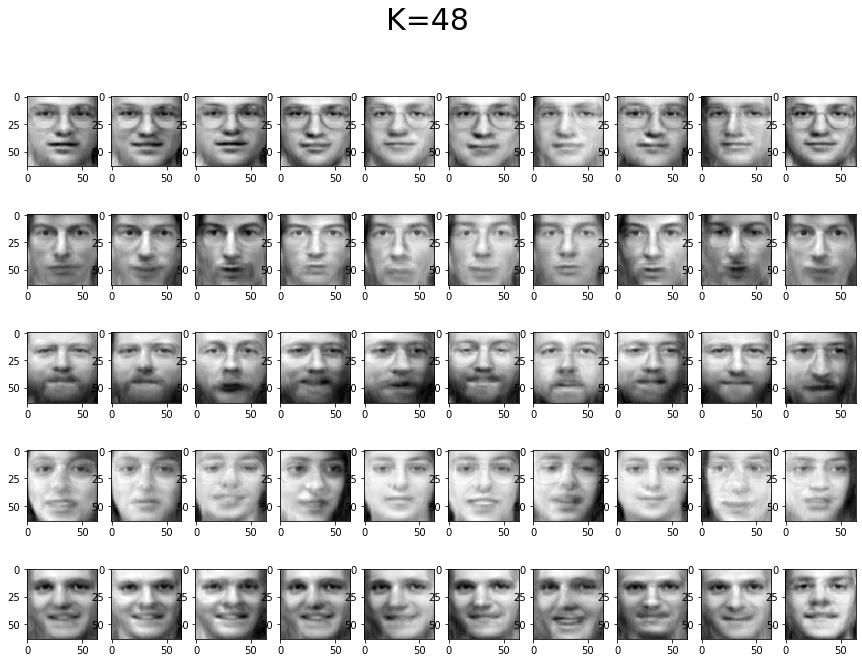

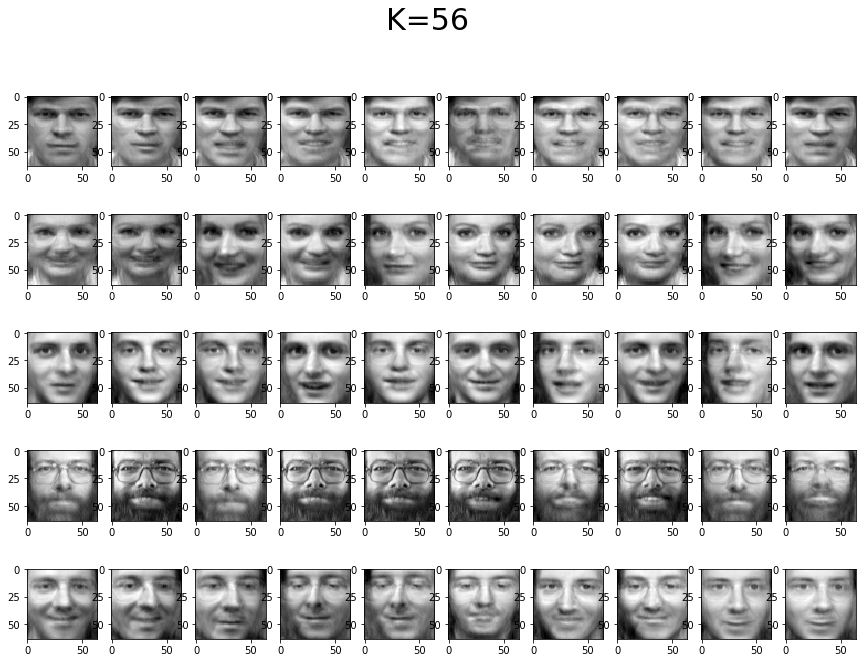

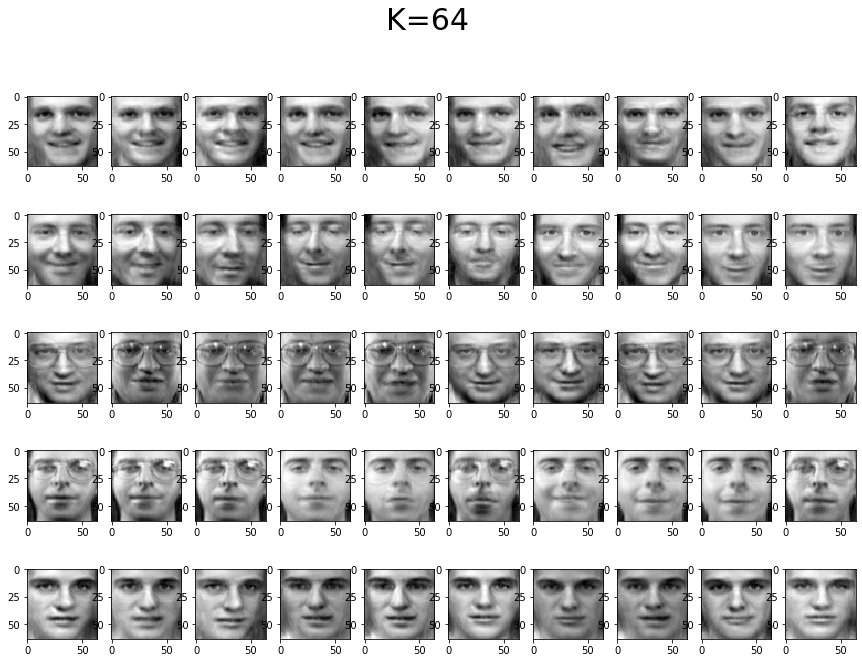

In [331]:
K = np.linspace(0, 64, 9).astype(np.int64)[1:]
print('project on K in ', K)
for k in K:
    pca = PCA(n_components=k)
    iamges_transformed = pca.fit_transform(images.reshape(images.shape[0], -1))
    images_zipped = pca.inverse_transform(iamges_transformed).reshape((-1, 64, 64))
    draw_sample(images_zipped, target, title=f'K={k}')

> После какого k фотографии теряют индивидуальные различия 

при $k < 32$ фотографии теряют различия внутри группы (для одного и того же человека). При $k=8$ фотографии уже неразличимы между разными людьми

> С помощью методов понижения размерности спроецировать объекты в $\mathbb{R}^2$. И визуализировать получившиеся данные

In [365]:
class DimensionReductor(TransformerMixin):
    def __init__(self, n_components, method_id):
        self.methods = [
            PCA(),
            KernelPCA(kernel="rbf"),
            KernelPCA(kernel="cosine"),
            KernelPCA(kernel="poly"),
            KernelPCA(kernel="sigmoid"),
            TSNE(),
            TSNE(method='exact'),
            MDS(),
            Isomap()
        ]
        self.method_names = [
            "PCA",
            "PCA with rbf kernel",
            "PCA with cosine kernel",
            "PCA with poly kernel",
            "PCA with sigmoid kernel",
            "PCA with rbf kernel",
            "t-SNE",
            "t-SNE with 'exact' gradient calculation algorithm",
            "MDS",
            "Isomap"
        ]
        
        assert method_id < len(self.methods)
        self.method_id = method_id
        self.method_name = self.method_names[method_id]
        self.n_components = n_components
    
    def __len__(self):
        return len(self.methods)
    
    def fit_transform(self, X):
        self.method = self.methods[self.method_id]
        self.method.n_components = self.n_components
        return self.method.fit_transform(X)

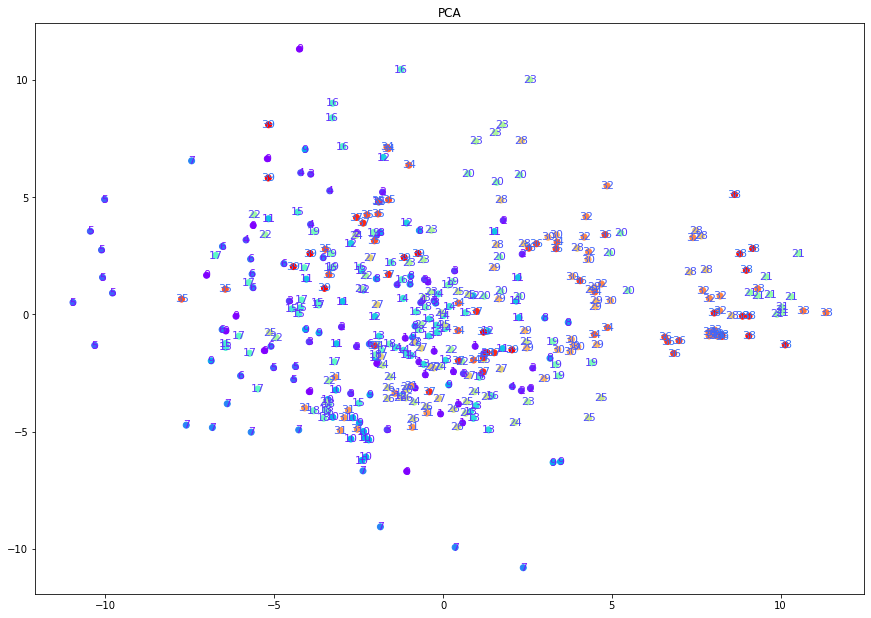

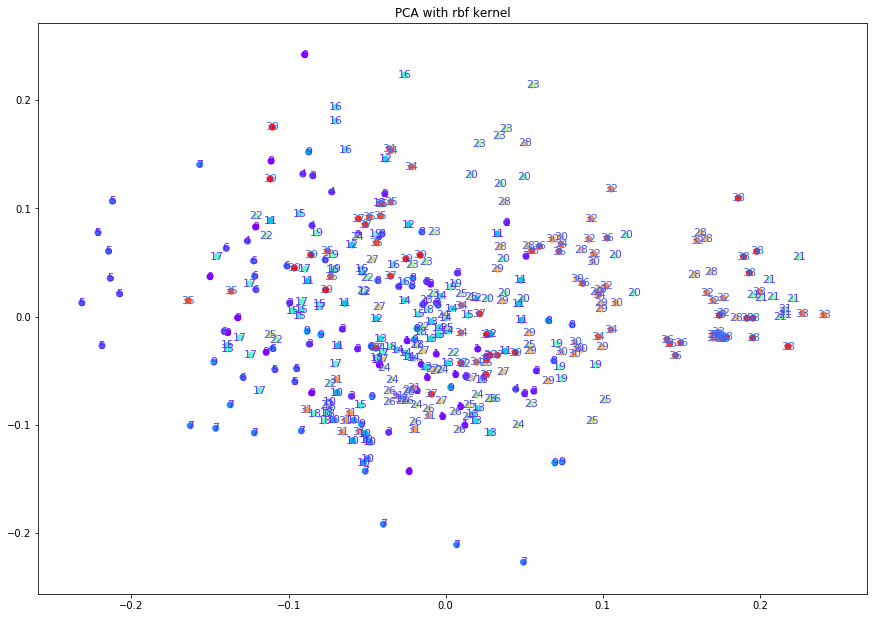

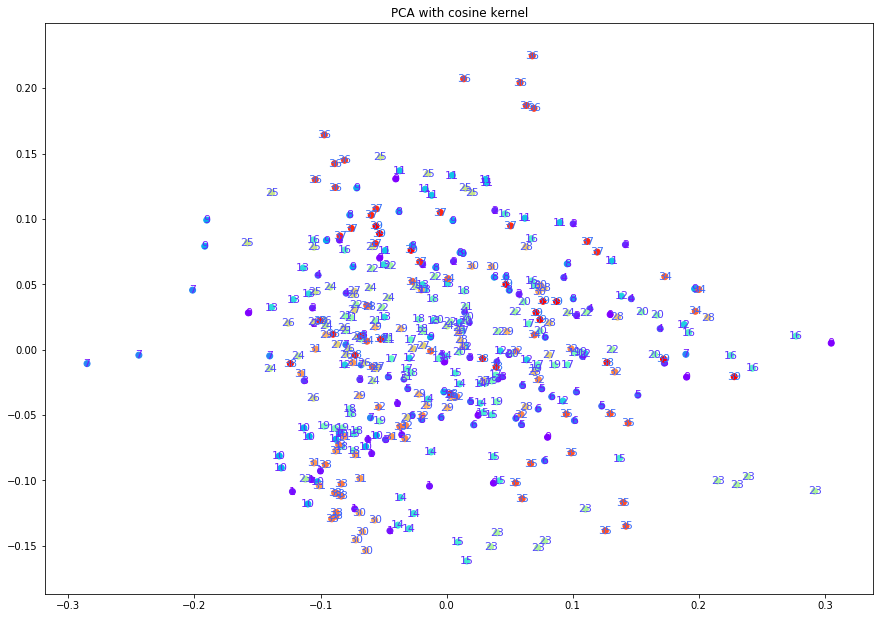

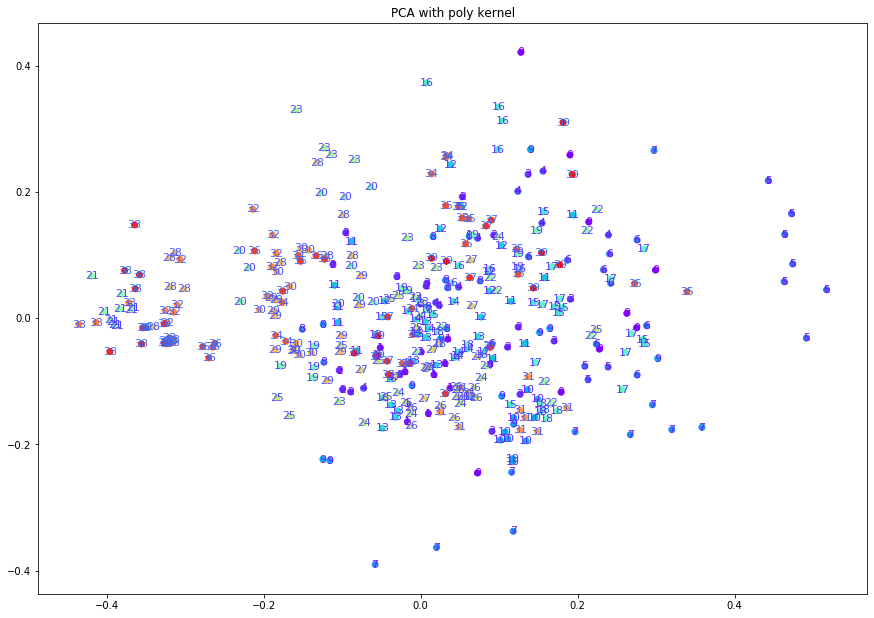

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


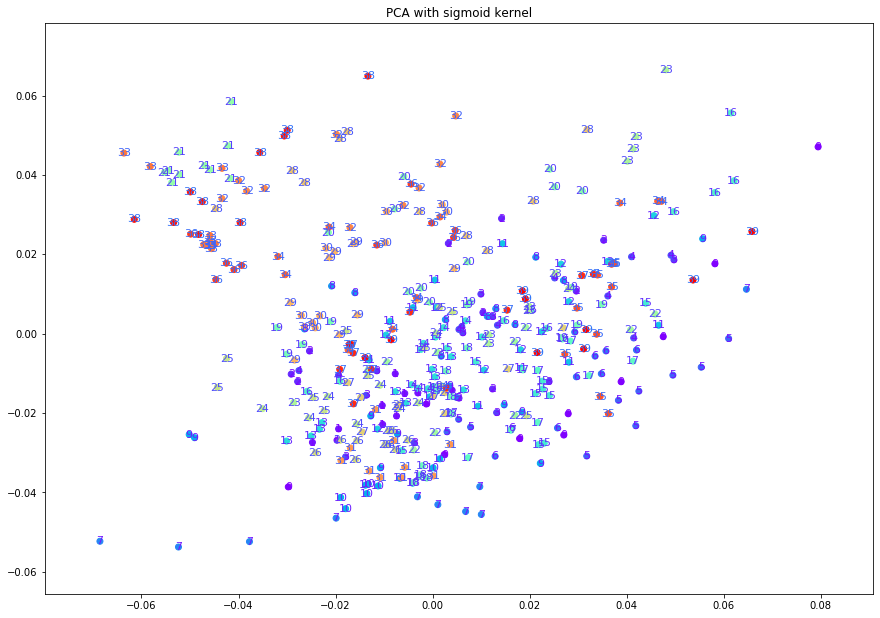

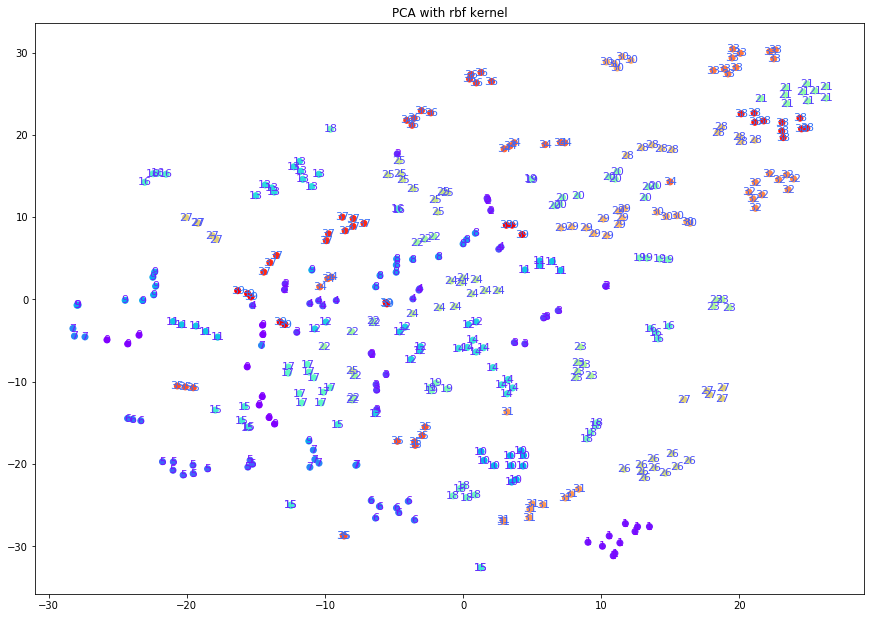

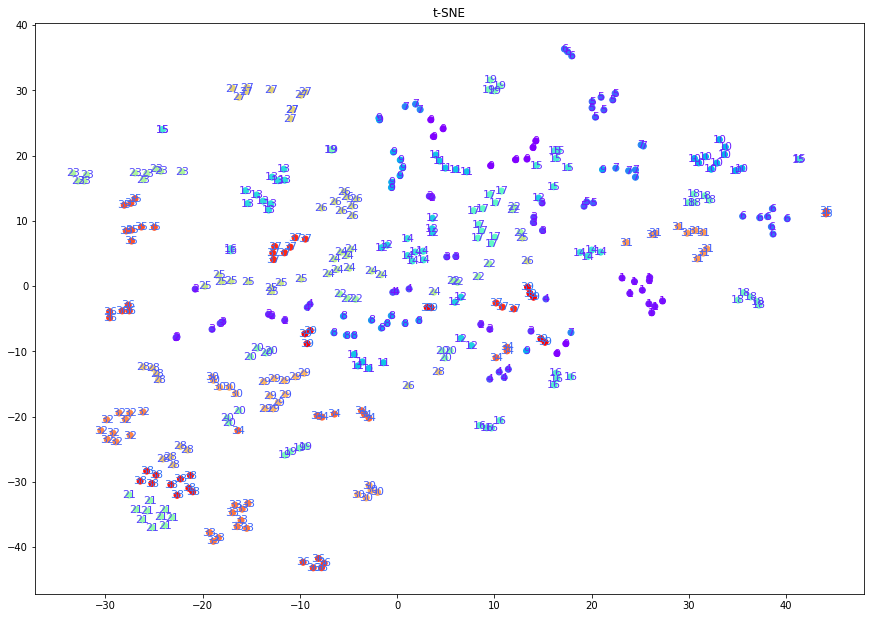

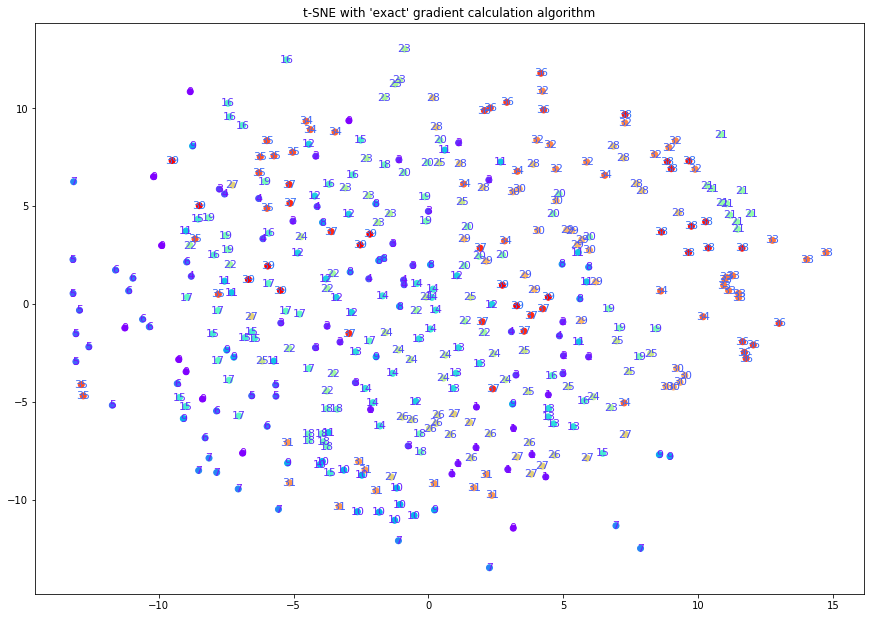

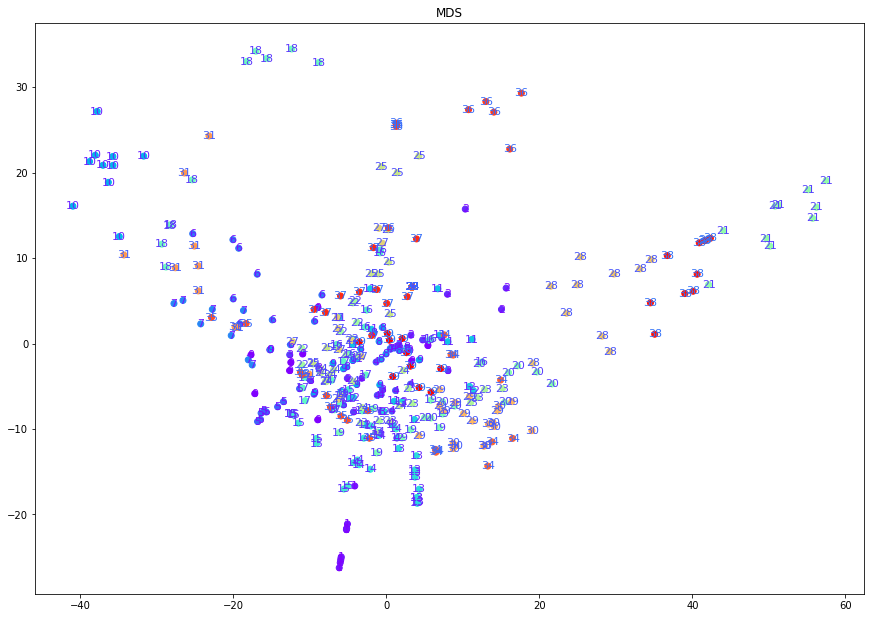

In [379]:
for method_id in range(len(DimensionReductor(1, 1))):
    dim_red = DimensionReductor(2, method_id)
    iamges_transformed = dim_red.fit_transform(images.reshape(images.shape[0], -1))
    X = iamges_transformed[:, 0]
    Y = iamges_transformed[:, 1]

    plt.figure(figsize=(29.7/2, 21./2))
    plt.title(dim_red.method_name)
    
    cmap=plt.get_cmap('rainbow')
    plt.scatter(X, Y, c=target, cmap=cmap)
    for i, (x, y) in enumerate(zip(X, Y)):
        plt.annotate(target[i], 
                     (x, y),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=11,
                     color=cmap(target[i])) 
    plt.show()

> Для каких методов получилось чёткое разделение на классы?

Безусловные победители – t-SNE и PCA с ядром rbf

## Задача 5

* Загрузим данные

In [399]:
data = pd.read_csv('./data/hw11t5.csv', index_col=0)
X = data[data.columns[1:]]
y = data[data.columns[0]]

* Изучим данные

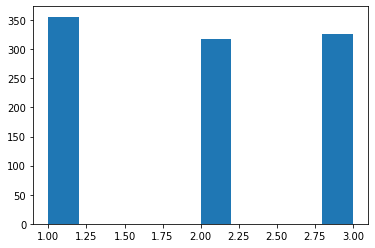

In [401]:
plt.hist(y)
plt.show()

In [402]:
X.describe()

1            2            3            4            5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     91.229888     4.199185    -0.014808     3.248896     2.519094   
std      58.167060     1.253185     2.138914     5.241760     1.549501   
min       0.895483     0.331931    -5.900755    -9.725361     0.002099   
25%      54.659985     3.316584    -1.357870    -0.476536     1.211617   
50%      75.572115     4.377548    -0.009941     4.212634     2.338732   
75%     115.380773     5.197345     1.329094     7.309513     3.567729   
max     317.549277     6.279979     6.097210    13.868179     6.178685   

                 6            7            8            9           10  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -2.643790    -1.016344     0.004254     0.166774    -2.138368   
std      49.192474     5.095105     0.723490     8.862615     4.659183   
min   -1372.122555   -11.304553    -1.000000   -90.730814   -12.842630   
25%      -1.053976    -5.236417    -0.740384    -0.176108    -5.396345   
50%      -0.101208    -0.680206    -0.017957    -0.025525    -1.526332   
75%       0.817378     3.114384     0.741550     0.164289     1.824511   
max      63.410529     8.440347     1.000000   260.776874     6.771898   

                11           12            13           14           15  
count  1000.000000  1000.000000  1.000000e+03  1000.000000  1000.000000  
mean     -0.157690    -1.122752  7.931667e+23    -0.007098    -4.253618  
std       0.752196    34.147307  2.013455e+25     0.849983    41.075582  
min      -1.000000 -1031.521300  1.000002e+00    -1.000000  -106.900832  
25%      -0.913138    -0.954613  6.549730e+00    -0.961775   -25.358752  
50%      -0.345943    -0.084984  6.930766e+02    -0.018483    -0.617321  
75%       0.597185     0.952022  4.553089e+05     0.934899    20.066396  
max       1.000000   165.031757  6.237491e+26     1.000000    93.878216

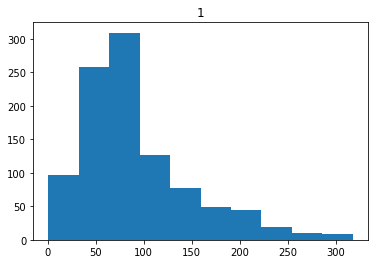

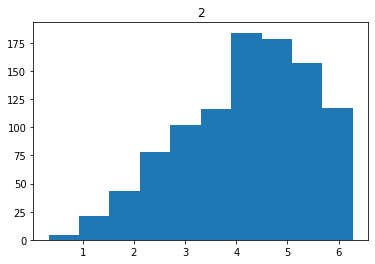

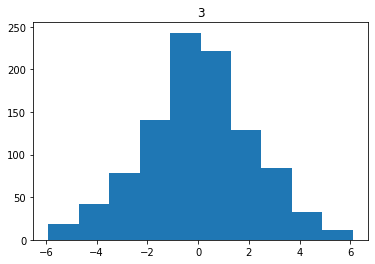

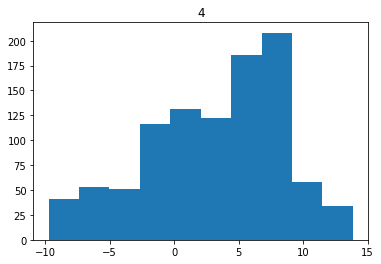

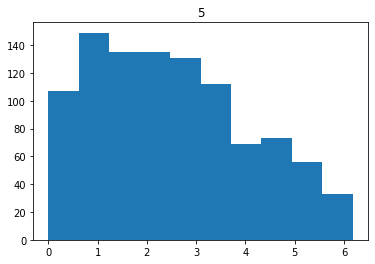

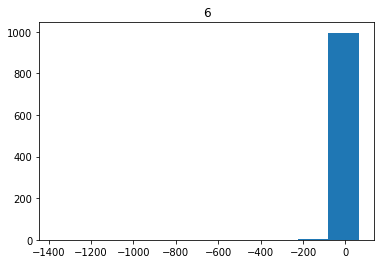

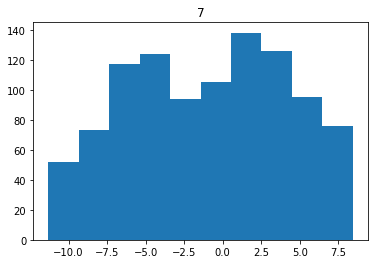

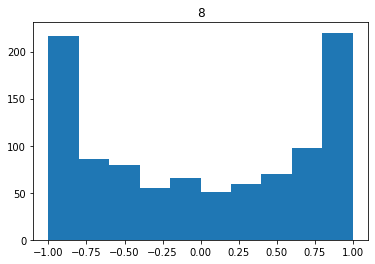

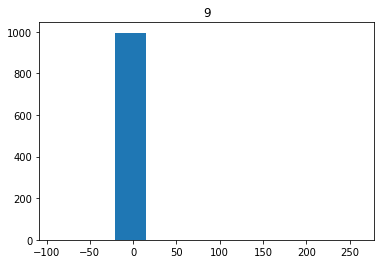

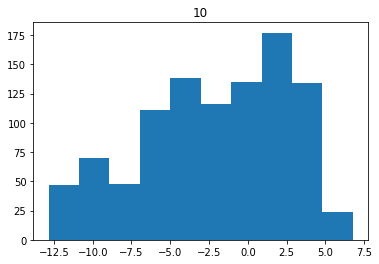

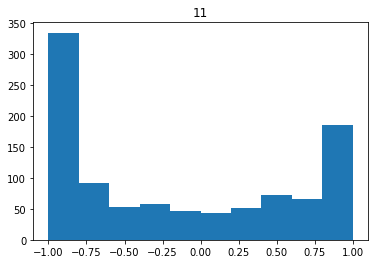

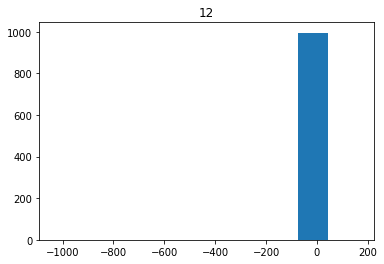

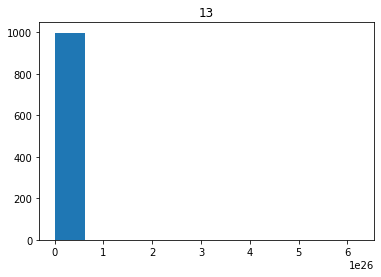

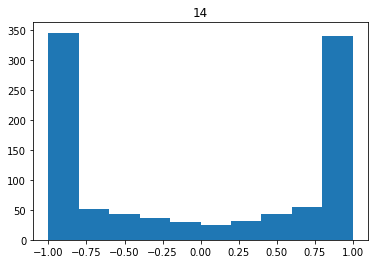

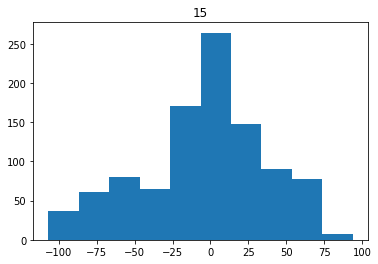

In [407]:
for i in range(15):
    plt.title(str(i+1))
    plt.hist(X[str(i+1)])
    plt.show()

* **Вывод:** кажется, что многие фичи имеют выбросы, посмотрим, как это скажется на понижении размерности

* **План решения:** 
    - Нормализую данные
    - выделю 2 главные компоненты, чтобы можно было удобно отрисовывать
    - Разделю данные 60/40 (train/test)
    - Предскажу на test точность
    - Выведу всё на одном графике

In [417]:
class DimensionReductor(TransformerMixin):
    def __init__(self, n_components, method_id):
        self.methods = [
            PCA(),
            KernelPCA(kernel="rbf"),
            KernelPCA(kernel="cosine"),
            KernelPCA(kernel="poly"),
            KernelPCA(kernel="sigmoid"),
            TSNE(),
            TSNE(method='exact'),
            MDS(),
            Isomap()
        ]
        self.method_names = [
            "PCA",
            "PCA with rbf kernel",
            "PCA with cosine kernel",
            "PCA with poly kernel",
            "PCA with sigmoid kernel",
            "PCA with rbf kernel",
            "t-SNE",
            "t-SNE with 'exact' gradient calculation algorithm",
            "MDS",
            "Isomap"
        ]
        
        assert method_id < len(self.methods)
        self.method_id = method_id
        self.method_name = self.method_names[method_id]
        self.n_components = n_components
    
    def __len__(self):
        return len(self.methods)
    
    def fit_transform(self, X):
        self.method = self.methods[self.method_id]
        self.method.n_components = self.n_components
        return self.method.fit_transform(X)

In [418]:
def get_knn_accuracy(X, y, test_size=0.4, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

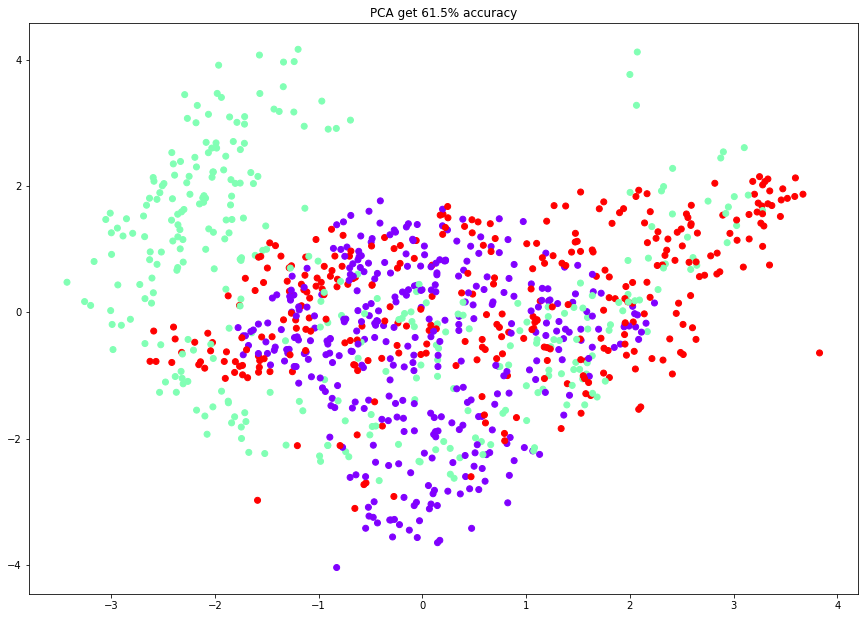

/Users/alex-kozinov/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


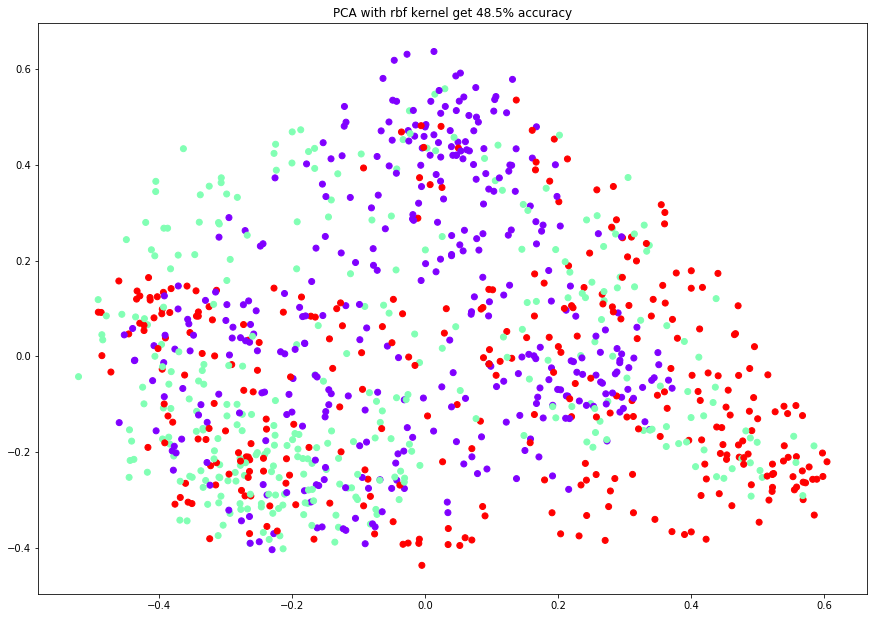

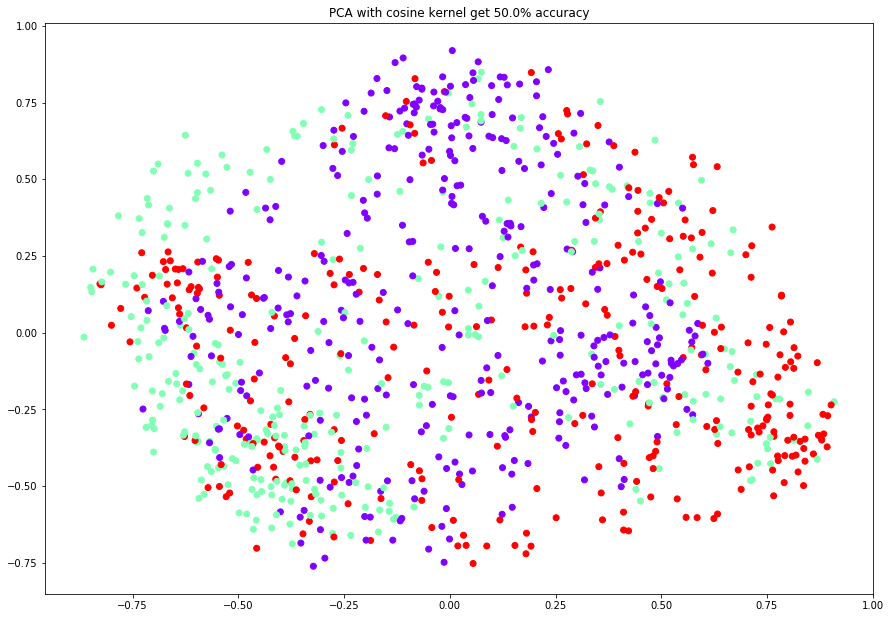

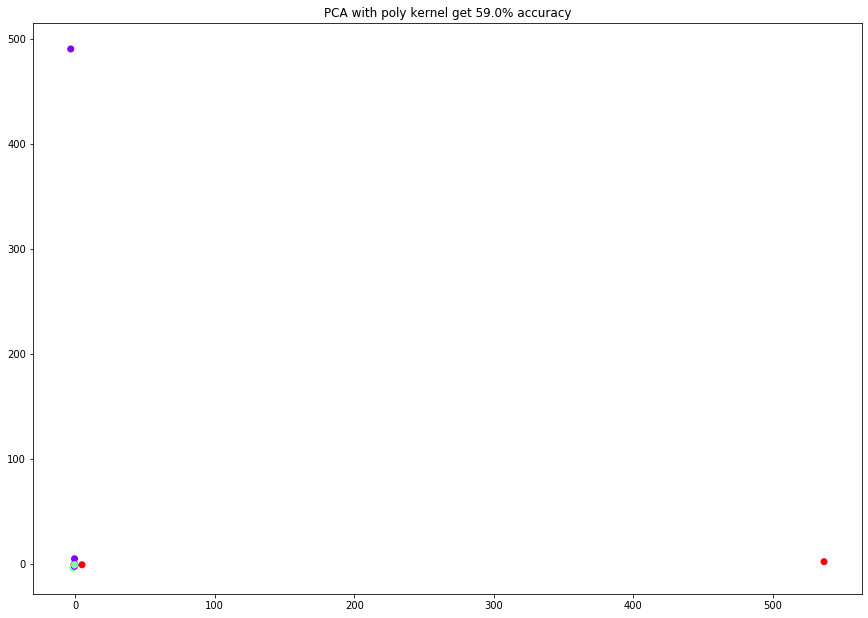

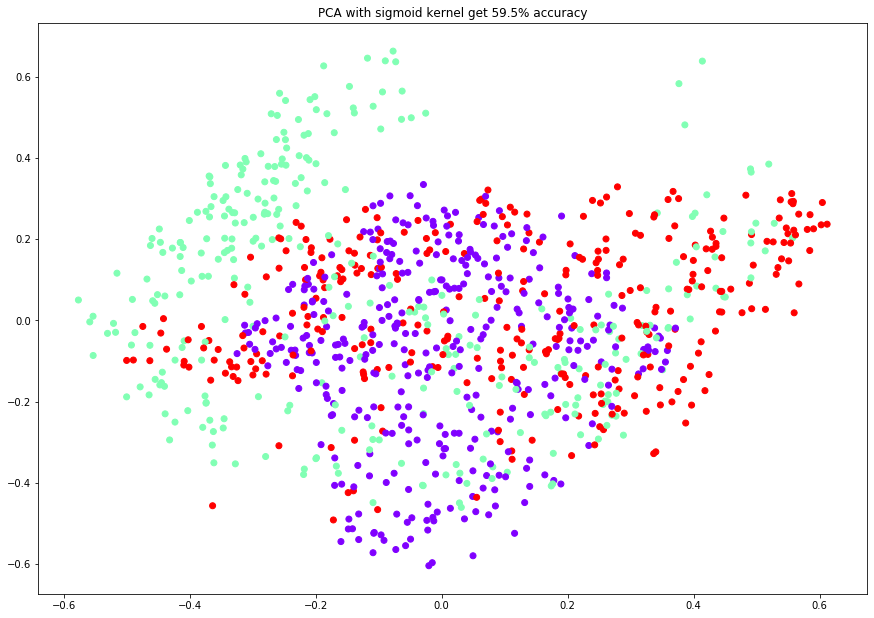

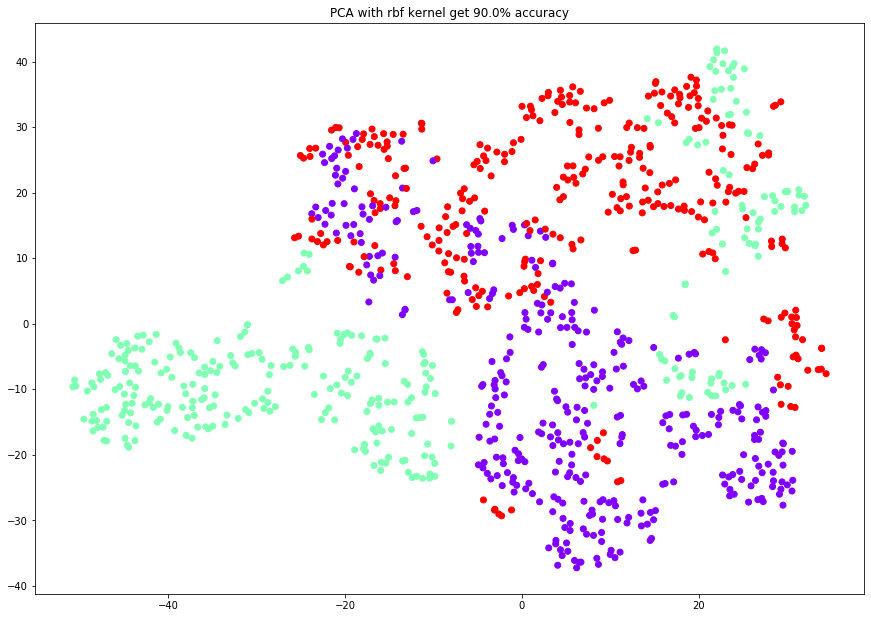

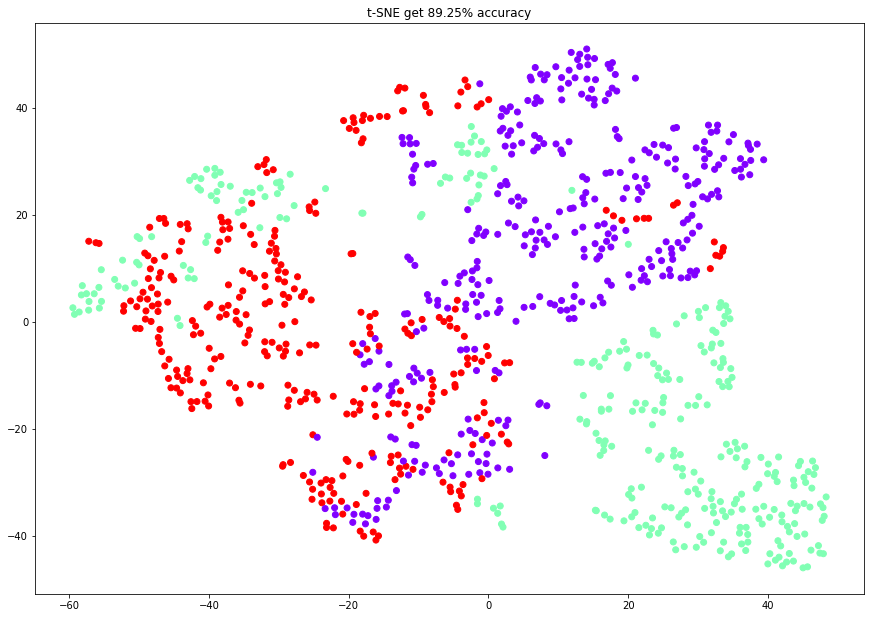

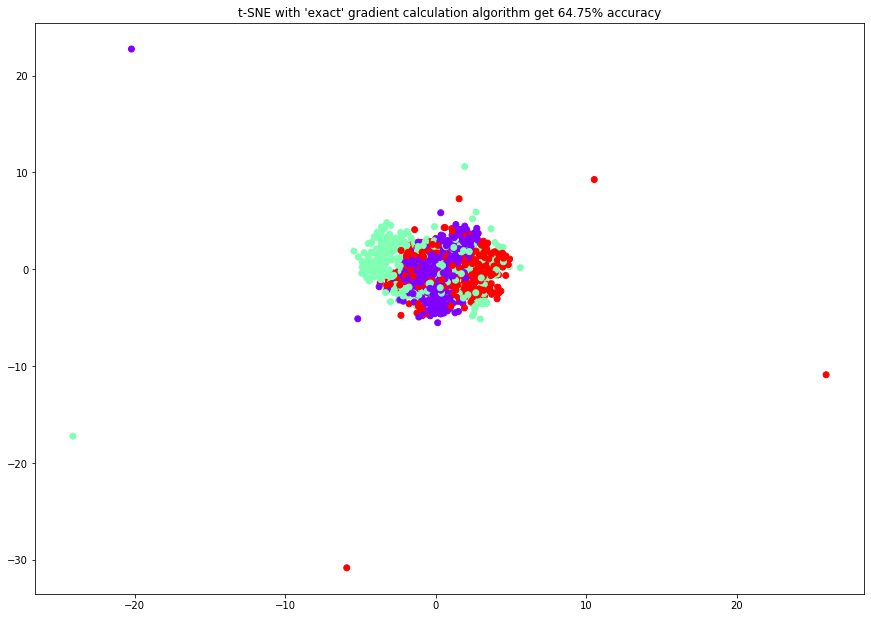

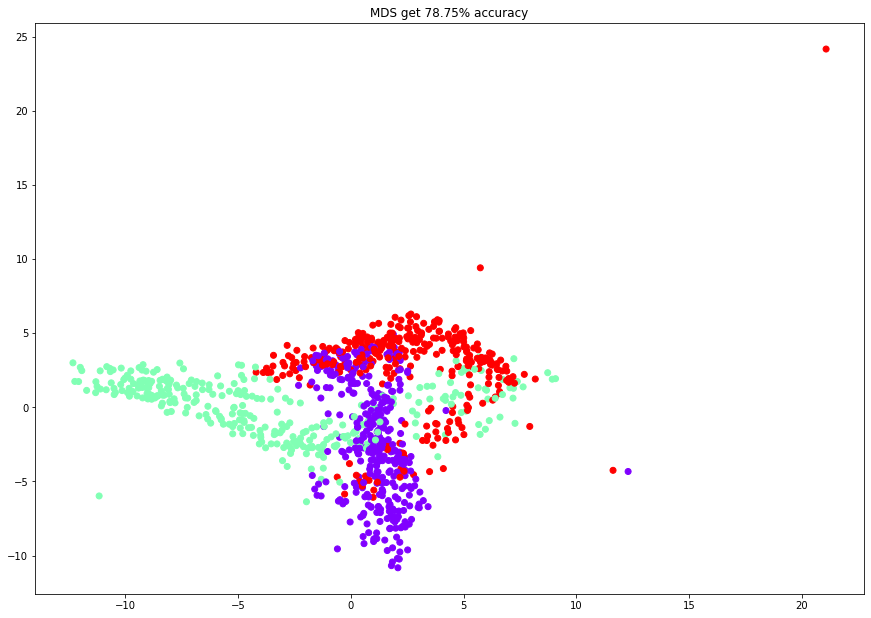

In [420]:
for method_id in range(len(DimensionReductor(1, 1))):
    dim_red = DimensionReductor(2, method_id)
    X_scaled = StandardScaler().fit_transform(X)
    X_2d = dim_red.fit_transform(X_scaled)
    X_s = X_2d[:, 0]
    Y_s = X_2d[:, 1]

    plt.figure(figsize=(29.7/2, 21./2))
    knn_accuracy = get_knn_accuracy(X_2d, y)
    plt.title(f'{dim_red.method_name} get {knn_accuracy*100}% accuracy')
    
    cmap=plt.get_cmap('rainbow')
    plt.scatter(X_s, Y_s, c=y, cmap=cmap)
    plt.show()

**Вывод:** И вот опять t-SNE и PCA с ядром rbf лучше всего кластеризуют данные. Другие методы не такие успешный, мне кажется, из-за того, что в данных много выбросов